Heigon Soldera 217638
Rafael Galib 204904

In [937]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

In [938]:
def MinMax(xy):
    features = []
    results = []
    newXY = []

    # Agrupa cada coordenada de um ponto em uma lista dentro de features e results
    for i in range(len(xy[0])):
        aux1 = []
        aux2 = []
        for j in range(len(xy)):
            aux1.append(xy[j][i])
            aux2.append(xy[j][i])
        features.append(aux1)
        results.append(aux2)


    # Normaliza os dados em results a partir dos dados em features
    for i in range(len(features)):
        for j in range(len(features[i])):
            results[i][j] = ((features[i][j] - min(features[i])) * 3) / (max(features[i])-min(features[i]))

    # Retorna para a configuração de lista de pontos
    for i in range(len(results)):
        for j in range(len(results[i])):
            if i == 0:
                aux = [results[i][j]]
                newXY.append(aux)
            else:
                newXY[j].append(results[i][j])
                
    return np.array(newXY)

In [939]:
with open('kick1.dat') as f:
    lines = f.readlines()
    xyz = np.array([[float(line.split()[0]),float(line.split()[1]),float(line.split()[2])] for line in lines])


    X = xyz[:,0]
    Y = xyz[:,1]
    Z = xyz[:,2]

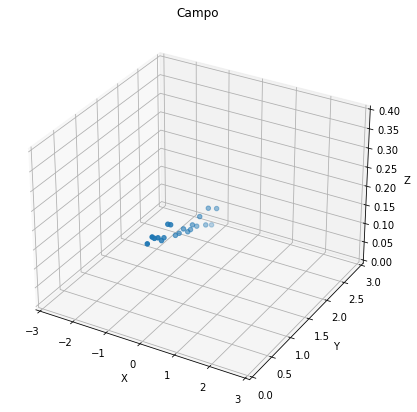

In [940]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

# Estimando X em função de Y
Aqui tentaremos calcular X(y) utilizando regressão linear e polinomial

# Linear Regression

# Hipótese
  
## $h_{\theta}(y) = x = \theta_0 + \theta_1 y$

In [941]:
def h(t0,t1,y):
    x = t0 + t1*y 
    return x

# Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - x)^2 $

# Derivadas 
  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times 1 $
  
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y $
  


# Atualização dos $\theta$
  
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times 1 $
  
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y $
  

In [942]:
t0A = 0
t1A = 0
alpha = 0.1
m = len(X)

for j in range(101):

    soma = 0
    for i in range(m):
        soma += (h(t0A,t1A, Y[i]) - X[i]) * 1
    t0N = t0A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h(t0A,t1A,Y[i]) - X[i]) * Y[i]
    t1N = t1A - (alpha/m) * soma


    t0A = t0N
    t1A = t1N
print(t0N)
print(t1N)

-0.6333056186773981
-0.03529916390908729


# Copiar a partir daqui vvv

# Linear Regression

# Hipótese
  
## $h_{\theta}(x,y) = z = \theta_0 + \theta_1 x + \theta_2 y$

In [943]:
def h(t0,t1,t2,x,y):
    z = t0 + t1*x + t2*y
    return z

# Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - z)^2 $

# Derivadas 
  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $ \frac{\partial}{\partial \theta_2} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

# Atualização dos $\theta$
  
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $\theta_{2} := \theta_{2} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

# Linear Regression

In [944]:
t0A = 0
t1A = 0
t2A = 0
alpha = 0.1
m = len(X)

for j in range(101):

    soma = 0
    for i in range(m):
        soma += (h(t0A,t1A,t2A,X[i],Y[i]) - Z[i]) * 1
    t0N = t0A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h(t0A,t1A,t2A,X[i],Y[i]) - Z[i]) * X[i]
    t1N = t1A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h(t0A,t1A,t2A,X[i],Y[i]) - Z[i]) * Y[i]
    t2N = t2A - (alpha/m) * soma

    t0A = t0N
    t1A = t1N
    t2A = t2N
print(t0N)
print(t1N)
print(t2N)

0.031228227984843582
-0.029212205334348398
0.04252152698289937


# Usando X Y para prever um z

In [945]:
newZ = []
for i in range(20):
    newZ.append(h(t0N,t1N,t2N,X[i],Y[i]))

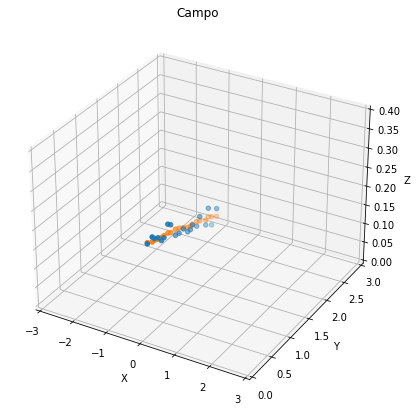

In [946]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.scatter3D(X,Y,newZ,'r')
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

# Regression Evalution

##  Mean Squared Root

## $\frac{1}{n} \sum_{j =1}^n (\bar{z}_j - z_j)^2$


In [947]:
soma = 0
for j in range(20):
    soma += (newZ[j] - Z[j])**2
msr = soma/20
print(msr)

0.0001962651725349547


# Chutando uns x e y novos para ver como fica (Num sei a melhor forma ainda)

In [948]:
listZ = []
y = Y[0]
x = X[0]
listX = []
listY = []
while y > 0:
    listZ.append(h(t0N,t1N,t2N,x,y))
    listX.append(x)
    listY.append(y)
    x -= 0.05
    y -= 0.05

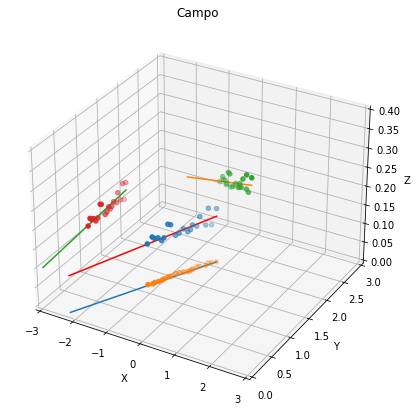

In [949]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.plot3D(listX,listY,listZ,'r')
ax.scatter3D(X, Y, np.zeros(len(Z)))
ax.plot3D(listX, listY, np.zeros(len(listZ)))
ax.scatter3D(X, np.ones(len(Y)) * 3, Z)
ax.scatter3D(np.ones(len(X)) * (-3), Y, Z)
ax.plot3D(listX, np.ones(len(listY)) * 3, listZ)
ax.plot3D(np.ones(len(listX)) * (-3), listY, listZ)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

# Polynomial Regression

In [950]:
with open('kick2.dat') as f:
    lines = f.readlines()
    xyz = np.array([[float(line.split()[0]),float(line.split()[1]),float(line.split()[2])] for line in lines])


    X = xyz[:,0]
    Y = xyz[:,1]
    Z = xyz[:,2]

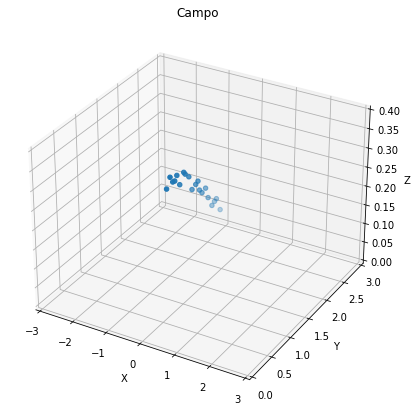

In [951]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

# Hipótese

## $h_{\theta}(x,y) = z = \theta_0 + \theta_1 x + \theta_2 y + \theta_3 x^2 + \theta_4 y^2$

In [952]:
def h2(t0,t1,t2,t3,t4,x,y):
    z = t0 + t1*x + t2*y + t3 * x**2 + t4 * y**2
    return z

# Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - z)^2 $

# Derivadas 
  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $ \frac{\partial}{\partial \theta_2} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $
  
## $ \frac{\partial}{\partial \theta_3} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2 $
  
## $ \frac{\partial}{\partial \theta_4} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^2 $

# Atualização dos $\theta$
  
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $\theta_{2} := \theta_{2} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

## $\theta_{3} := \theta_{3} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2 $

## $\theta_{4} := \theta_{4} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^2 $

In [953]:
t0A = 0
t1A = 0
t2A = 0
t3A = 0
t4A = 0
alpha = 0.15
m = len(X)

for j in range(2000):

    soma = 0
    for i in range(m):
        soma += (h2(t0A,t1A,t2A,t3A,t4A,X[i],Y[i]) - Z[i]) * 1
    t0N = t0A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h2(t0A,t1A,t2A,t3A,t4A,X[i],Y[i]) - Z[i]) * X[i]
    t1N = t1A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h2(t0A,t1A,t2A,t3A,t4A,X[i],Y[i]) - Z[i]) * Y[i]
    t2N = t2A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h2(t0A,t1A,t2A,t3A,t4A,X[i],Y[i]) - Z[i]) * X[i]**2
    t3N = t3A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h2(t0A,t1A,t2A,t3A,t4A,X[i],Y[i]) - Z[i]) * Y[i]**2
    t4N = t4A - (alpha/m) * soma

    t0A = t0N
    t1A = t1N
    t2A = t2N
    t3A = t3N
    t4A = t4N
print(t0N)
print(t1N)
print(t2N)
print(t3N)
print(t4N)

0.1528337457407165
-0.11337824154136568
0.14520409287262953
0.022264831419290424
-0.07339602214038743


# Usando X Y para prever um z

In [954]:
newZ = []
for i in range(20):
    newZ.append(h2(t0N,t1N,t2N,t3N,t4N,X[i],Y[i]))

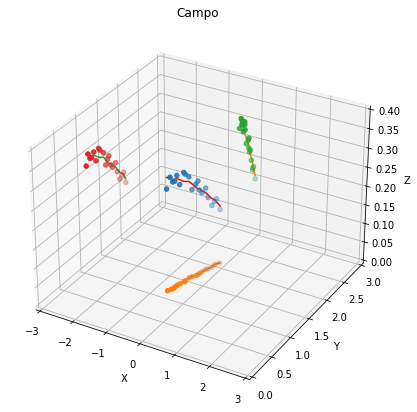

In [955]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.plot3D(X, Y, newZ,'r')
ax.scatter3D(X, Y, np.zeros(len(Z)))
ax.plot3D(X, Y, np.zeros(len(Z)))
ax.scatter3D(X, np.ones(len(Y)) * 3, Z)
ax.scatter3D(np.ones(len(X)) * (-3), Y, Z)
ax.plot3D(X, np.ones(len(Y)) * 3, newZ)
ax.plot3D(np.ones(len(X)) * (-3), Y, newZ)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

In [956]:
soma = 0
for j in range(20):
    soma += (newZ[j] - Z[j])**2
msr = soma/20
print(msr)

0.00018309345129690924


# Hipótese

## $h_{\theta}(x,y) = z = \theta_0 + \theta_1 x + \theta_2 y + \theta_3 xy + \theta_4 x^2 + \theta_5 y^2$

In [957]:
def h3(t0,t1,t2,t3,t4,t5,x,y):
    z = t0 + t1*x + t2*y + t3 *x*y + t4 * x**2 + t5 * y**2
    return z

# Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - z)^2 $

# Derivadas 
  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $ \frac{\partial}{\partial \theta_2} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

## $ \frac{\partial}{\partial \theta_3} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times xy $
  
## $ \frac{\partial}{\partial \theta_4} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2 $
  
## $ \frac{\partial}{\partial \theta_5} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^2 $

# Atualização dos $\theta$
  
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $\theta_{2} := \theta_{2} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

## $\theta_{3} := \theta_{3} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times xy $

## $\theta_{4} := \theta_{4} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2 $

## $\theta_{5} := \theta_{5} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^2 $

In [958]:
t0A = 0
t1A = 0
t2A = 0
t3A = 0
t4A = 0
t5A = 0
alpha = 0.15
m = len(X)

for j in range(2000):

    soma = 0
    for i in range(m):
        soma += (h3(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * 1
    t0N = t0A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h3(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * X[i]
    t1N = t1A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h3(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * Y[i]
    t2N = t2A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h3(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * ( X[i] * Y[i])
    t3N = t3A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h3(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * X[i]**2
    t4N = t4A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h3(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * Y[i]**2
    t5N = t5A - (alpha/m) * soma

    t0A = t0N
    t1A = t1N
    t2A = t2N
    t3A = t3N
    t4A = t4N
    t5A = t5N

print(t0N)
print(t1N)
print(t2N)
print(t3N)
print(t4N)
print(t5N)

0.11214711092877334
-0.07380361095735924
0.09607636217338705
-0.1250287925815378
0.018875131263023676
-0.04750121691408037


In [959]:
newZ = []
for i in range(20):
    newZ.append(h3(t0N,t1N,t2N,t3N,t4N,t5N,X[i],Y[i]))

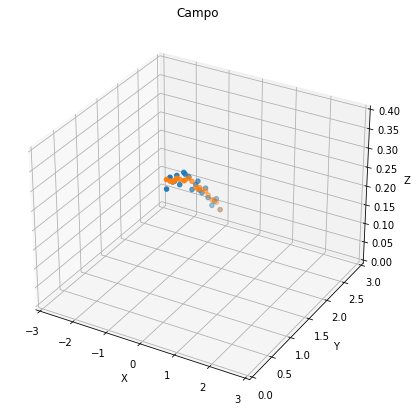

In [960]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.scatter3D(X,Y,newZ,'r')
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

In [961]:
soma = 0
for j in range(20):
    soma += (newZ[j] - Z[j])**2
msr = soma/20
print(msr)

0.00015579503650514133


In [962]:
listZ = []
y = Y[0]
x = X[0]
listX = []
listY = []
while y >= 0:
    listZ.append(h3(t0N,t1N,t2N,t3N,t4N,t5N,x,y))
    listX.append(x)
    listY.append(y)
    x -= 0.025
    y -= 0.05

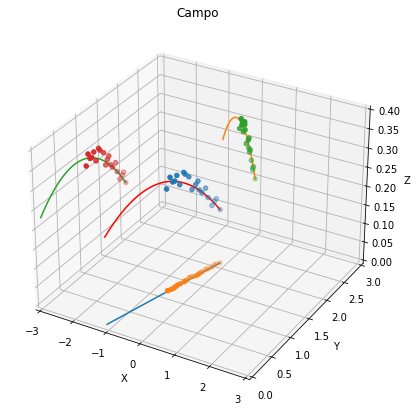

In [963]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.plot3D(listX,listY,listZ,'r')
ax.scatter3D(X, Y, np.zeros(len(Z)))
ax.plot3D(listX, listY, np.zeros(len(listZ)))
ax.scatter3D(X, np.ones(len(Y)) * 3, Z)
ax.scatter3D(np.ones(len(X)) * (-3), Y, Z)
ax.plot3D(listX, np.ones(len(listY)) * 3, listZ)
ax.plot3D(np.ones(len(listX)) * (-3), listY, listZ)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

# Hipótese

## $h_{\theta}(x,y) = z = \theta_0 + \theta_1 x + \theta_2 y + \theta_3 xy + \theta_4 x^2 + \theta_5 y^2 + \theta_6 x^2y + \theta_7 xy^2 + \theta_8 x^2y^2$

In [964]:
def h4(t0,t1,t2,t3,t4,t5,t6,t7,t8,x,y):
    z = t0 + t1*x + t2*y + t3 *x*y + t4 * x**2 + t5 * y**2 + t6 * x**2 * y + t7 * x * y**2 + t8 * x**2 * y**2
    return z

# Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - z)^2 $

# Derivadas 
  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $ \frac{\partial}{\partial \theta_2} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

## $ \frac{\partial}{\partial \theta_3} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times xy $
  
## $ \frac{\partial}{\partial \theta_4} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2 $
  
## $ \frac{\partial}{\partial \theta_5} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^2 $

## $ \frac{\partial}{\partial \theta_6} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2y $

## $ \frac{\partial}{\partial \theta_7} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times xy^2 $

## $ \frac{\partial}{\partial \theta_8} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2y^2 $

# Atualização dos $\theta$
  
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $\theta_{2} := \theta_{2} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

## $\theta_{3} := \theta_{3} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times xy $

## $\theta_{4} := \theta_{4} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2 $

## $\theta_{5} := \theta_{5} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^2 $

## $\theta_{6} := \theta_{6} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2y $

## $\theta_{7} := \theta_{7} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times xy^2 $

## $\theta_{8} := \theta_{8} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2y^2 $

In [965]:
t0A = 0
t1A = 0
t2A = 0
t3A = 0
t4A = 0
t5A = 0
t6A = 0
t7A = 0
t8A = 0
alpha = 0.1
m = len(X)

for j in range(3000):

    soma = 0
    for i in range(m):
        soma += (h4(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * 1
    t0N = t0A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h4(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * X[i]
    t1N = t1A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h4(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * Y[i]
    t2N = t2A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h4(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * ( X[i] * Y[i])
    t3N = t3A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h4(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * (X[i]**2)
    t4N = t4A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h4(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * (Y[i]**2)
    t5N = t5A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h4(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * ((X[i]**2) * Y[i])
    t6N = t6A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h4(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * (X[i] * (Y[i]**2))
    t7N = t7A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h4(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * ((X[i]**2) * (Y[i]**2))
    t8N = t8A - (alpha/m) * soma

    t0A = t0N
    t1A = t1N
    t2A = t2N
    t3A = t3N
    t4A = t4N
    t5A = t5N
    t6A = t6N
    t7A = t7N
    t8A = t8N
print(t0N)
print(t1N)
print(t2N)
print(t3N)
print(t4N)
print(t5N)
print(t6N)
print(t7N)
print(t8N)

0.10647227757537578
-0.062371221971935925
0.07065420835655727
-0.06262134180928774
0.030164322905485385
-0.035883176794936744
0.03781007402989041
-0.038980804353137645
0.0405331499593436


In [966]:
newZ = []
for i in range(20):
    newZ.append(h4(t0N,t1N,t2N,t3N,t4N,t5N,t6N,t7N,t8N,X[i],Y[i]))

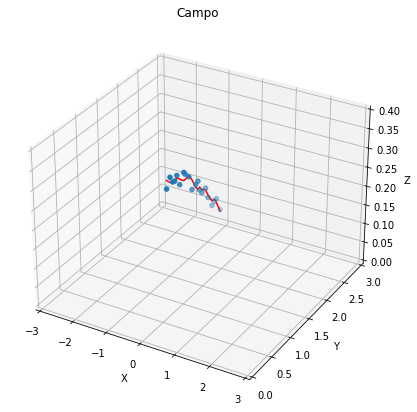

In [967]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.plot3D(X,Y,newZ,'r')
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

In [968]:
soma = 0
for j in range(20):
    soma += (newZ[j] - Z[j])**2
msr = soma/20
print(msr)

0.00016097588675901604


In [969]:
listZ = []
y = Y[0]
x = X[0]
listX = []
listY = []
while y >= 0:
    listZ.append(h4(t0N,t1N,t2N,t3N,t4N,t5N,t6N,t7N,t8N,x,y))
    listX.append(x)
    listY.append(y)
    x -= 0.025
    y -= 0.05

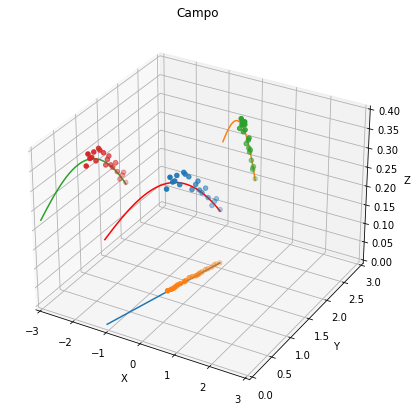

In [970]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.plot3D(listX,listY,listZ,'r')
ax.scatter3D(X, Y, np.zeros(len(Z)))
ax.plot3D(listX, listY, np.zeros(len(listZ)))
ax.scatter3D(X, np.ones(len(Y)) * 3, Z)
ax.scatter3D(np.ones(len(X)) * (-3), Y, Z)
ax.plot3D(listX, np.ones(len(listY)) * 3, listZ)
ax.plot3D(np.ones(len(listX)) * (-3), listY, listZ)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

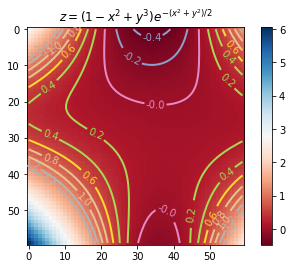

In [971]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
 
x = arange(-3.0,3.0,0.1)
y = arange(-3.0,3.0,0.1)
X,Y = meshgrid(x, y) # grid of point
Z = h4(t0N,t1N,t2N,t3N,t4N,t5N,t6N,t7N,t8N,X,Y) # evaluation of the function on the grid

im = imshow(Z,cmap=cm.RdBu) # drawing the function
# adding the Contour lines with labels
cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
title('$z=(1-x^2+y^3) e^{-(x^2+y^2)/2}$')
show()

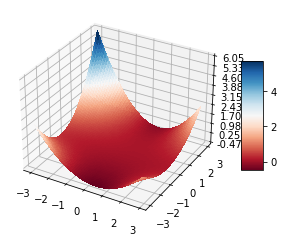

In [972]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))



fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()